In [4]:
import NPGM
import BSpline
import ProximalOPT

In [59]:
import PyPlot

In [60]:
reload("NPGM")

In [ ]:
n = 500
p = 300
covM = eye(p)
for a=1:p
    for b=a+1:p
        covM[a,b] = 0.5^abs(a-b)
    end
end
X = randn(n, p) * sqrtm(covM);

M = 4
numKnotsNode = 4
numKnotsEdge = 2
xmin = -4.
xmax = 4.

In [74]:
θ, A, b, groups, K, L, f_node, f_node_der, f_node_der2, f_edge, f_edge_der, f_edge_der2 =
  NPGM.prepare_data_for_neighborhood_opt(X, 1, M, numKnotsNode, numKnotsEdge, xmin, xmax); 

In [87]:
objF = ProximalOPT.QuadraticFunction(A, b)
penF = ProximalOPT.ProxL1L2(0.05, groups)

ProxSumProx{ProxL2{Float64},UnitRange{Int64}}(ProxL2{Float64}(0.05),[1:6,7:22,23:38,39:54,55:70,71:86,87:102,103:118,119:134,135:150  …  4631:4646,4647:4662,4663:4678,4679:4694,4695:4710,4711:4726,4727:4742,4743:4758,4759:4774,4775:4790])

In [88]:
options = ProximalOPT.ProximalOptions()
ProximalOPT.solve!(ProximalOPT.AccProxGradDescent(), θ, objF, penF; options=options)

Iter     Function value 
------   -------------- 


In [ ]:
@show svdvals(A)

In [64]:
ed = NPGM.CondDensity(θ, 1, f_node, f_edge, K, L, -4., 4.);

In [71]:
ex, ey = NPGM.condDensity(ed, [0.,-1.,0.], 1000);

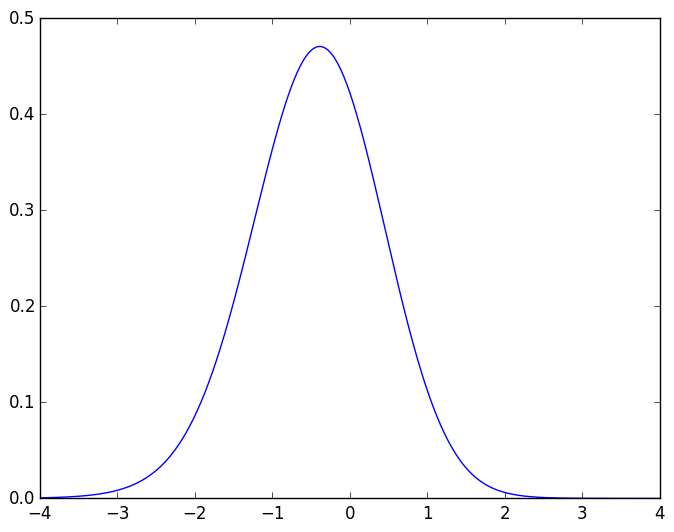

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6ddce25ed0>

In [72]:
PyPlot.plot(ex, ey)

In [58]:
@show θ'

θ' => [-0.4771945368867927 -5.940292111855102 6.782431649305216 7.036877854069339 -5.319489945036549 -2.082332909597075 1.5082130256512263 5.542943243677626 -6.00199574773421 -1.0491605215947295 5.117638927998589 27.514619925378625 -25.995550124584415 -6.636708728791283 -6.383653551368474 -25.708733935079348 27.192017148601398 4.900370337847668 -1.0477792232803473 -6.051542955293892 5.612505155741015 1.4868170228331883 -0.16209997521283978 -0.1966692552739526 0.38755119266123983 -0.028781962174449935 -1.1555894131941973 -1.2734940006464404 2.8163877915961275 -0.38730437775553866 0.33746921722042456 2.1422900712139232 -1.722396228411625 -0.7573630600227345 0.1746393501873497 0.6251594633885658 -0.6745663238230956 -0.12523248975282883]


1x38 Array{Float64,2}:
 -0.477195  -5.94029  6.78243  7.03688  …  0.625159  -0.674566  -0.125232